In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [1]:
!nvidia-smi

Wed Dec 25 14:25:54 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [0]:
!rm -rf SA.py

In [6]:
def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

upload_files()

Saving CNNModel.py to CNNModel.py
Saving ConvolutionLayer.py to ConvolutionLayer.py
Saving FullyConnectedLayer.py to FullyConnectedLayer.py
Saving Hyperparameters.py to Hyperparameters.py
Saving PoolingLayer.py to PoolingLayer.py
Saving SA.py to SA.py


['CNNModel.py',
 'ConvolutionLayer.py',
 'FullyConnectedLayer.py',
 'Hyperparameters.py',
 'PoolingLayer.py',
 'SA.py']

In [7]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [9]:
x_test.shape

(10000, 28, 28, 1)

In [0]:
np.random.seed(226)
Xtrain = np.empty((30000,28,28,1), dtype='uint8')
Ytrain = np.empty((30000), dtype='uint8')
Xtest = np.empty((5000,28,28,1), dtype='uint8')
Ytest = np.empty((5000), dtype='uint8')

for i in range(30000):
    rnd = np.random.randint(0, x_train.shape[0])
    Xtrain[i,:] = x_train[rnd,:]
    Ytrain[i] = y_train[rnd]

for j in range(5000):
    rnd = np.random.randint(0, y_test.shape[0])
    Xtest[j,:] = x_test[rnd,:]
    Ytest[j] = y_test[rnd]

In [0]:
################## DEĞİŞ
np.random.seed(10)

input_shape = [None, 28, 28, 1]
number_of_classes = 10

#Conver output label to one hot vector
Ytrain = to_categorical(Ytrain, number_of_classes)
Ytest = to_categorical(Ytest, number_of_classes)

In [12]:
Xtrain, Xvalid, Ytrain, Yvalid = train_test_split(Xtrain, Ytrain, 
                                                test_size = 5000, random_state = 42)

print("Shape of training features: {}".format(Xtrain.shape))
print("Shape of training lables: {}".format(Ytrain.shape))
print("Shape of testing features: {}".format(Xvalid.shape))
print("Shape of testing lables: {}".format(Yvalid.shape))

Shape of training features: (25000, 28, 28, 1)
Shape of training lables: (25000, 10)
Shape of testing features: (5000, 28, 28, 1)
Shape of testing lables: (5000, 10)


In [0]:
#Hyper parameters
learning_rate = 0.01
epoch = 50
batch_size = 32

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


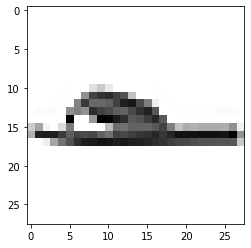

In [14]:
print(Ytrain[1])
plt.imshow(Xtrain[1,:,:,-1], cmap='Greys')

In [0]:
Xtrain = Xtrain.astype('float32')
Xvalid = Xvalid.astype('float32')

In [0]:
import SA as sannealing

In [17]:
Xvalid.shape

(5000, 28, 28, 1)

In [0]:
parameters = {'x_train': Xtrain , 'y_train': Ytrain, 'x_valid': Xvalid, 'y_valid': Yvalid, 'batch_size':batch_size, 'learning_rate':0.0001}

alg = sannealing.SA(**parameters)
deltaF = alg.burninPhase()













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 25000 samples, validate on 5000 samples
Epoch 1/5
25000/25000 [==============================] - 21s 844us/step - loss: 1.1007 - acc: 0.6448 - val_loss: 0.5054 - val_acc: 0.8184
Epoch 2/5
25000/25000 [==============================] - 13s 532us/step - loss: 0.6471 - acc: 0.7811 - val_loss: 0.4172 - val_acc: 0.8542
Epoch 3/5
25000/25000 [==============================] - 13s 534us/step - loss: 0.5424 - acc: 0.8193 - val_loss: 0.3995 - val_acc: 0.8644
Epoch 4/5
25000/25000 [==============================] - 13s 539us/step - loss: 0.4787 - acc: 0.8408 - val_loss: 0.3588 - val_acc: 0.8774
Epoch 5/5
25000/25000 [==============================] - 13s 524us/step - loss: 0.4317 - acc: 0.8544 - val_loss: 0.3295 - val_acc: 0.8844

Initial Solution Created...
Initial

In [0]:
print("T_init:", alg.calculate_TInit(deltaF))